<a href="https://colab.research.google.com/github/miller00315/ia_studies/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regretion with Neural networks and tensroflow

There are many definitions of regression problem but in our cas, we're going to simplify it: predicting a numerial variable based on some other combination of variable, even shorter.. predicting a number

In [1]:
# Import tensorflow

import tensorflow as tf
print(tf.__version__)

2.15.0


##Creating data to view and fit

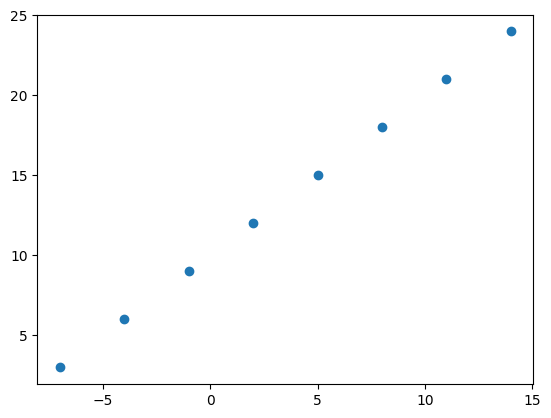

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labes
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualise it
plt.scatter(X, y);

In [3]:
y == X + 3

array([False, False, False, False, False, False, False, False])

# Input and output shapes

In [4]:
# Cerate a demo tensor for our housing prise prediction problema

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price



(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [5]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
#Turn our numpy array into tensors

In [ ]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

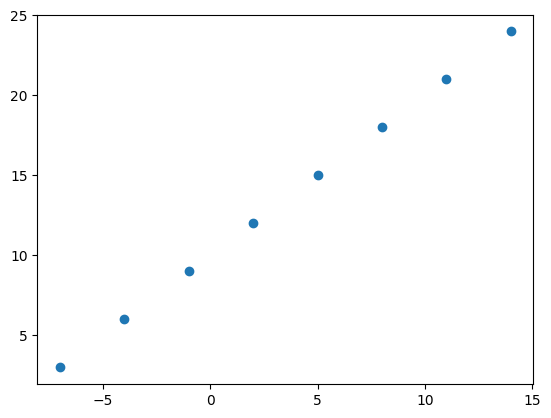

In [8]:
plt.scatter(X, y);

## Steps in modelling eith tensroflow:

1. **Creating a model** - define the input and the output layers, as well as the
hidden layers of a deep learning model.
2. **Compiling  a model** - define the loss function (in others words, the function which tells our model how wrong it is) and the optimizer (tells our model to improe the patterns its learning) and evaluation metrics (what we can use to interpret perform of our model)
3. Fitting a model -  letting the model trye to find patterns between X & y (features and labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])


# 2. Compile the model

model.compile(loss=tf.keras.losses.mae, # mae is short for mean square error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=4)

Epoch 1/100
1/1 [==============================] - 0s 368ms/step - loss: 13.4974 - mae: 13.4974
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3649 - mae: 13.3649
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 13.2324 - mae: 13.2324
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 13.0999 - mae: 13.0999
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9674 - mae: 12.9674
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8349 - mae: 12.8349
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 12.7024 - mae: 12.7024
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 12.5699 - mae: 12.5699
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4374 - mae: 12.4374
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 12.3049 - mae: 12.3049
Epoch 11/100
1/1 [==============================] -

In [ ]:
# Check X and y

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and mahe a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 64ms/step


array([[29.442749]], dtype=float32)

##Improving our model

We can improve our model, by altering the steps we took to create a model

1.**Creating a model** - here we might add more layers, increase the number of the hidden layers, change the activation function of each layer.

2.**Compiling a model** - here we might change the optimizantion function or perhaps the **learning rate** of the optimization function

3.**Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).


In [ ]:
# Let rebuild our model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae, # mae is short for mean square error
              optimizer=tf.keras.optimizers.SGD(), # s
              metrics=["mae"]
              )

# Fit the model (this time we'll trin for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.9031 - mae: 12.9031
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.7706 - mae: 12.7706
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.6381 - mae: 12.6381
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 12.5056 - mae: 12.5056
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.3731 - mae: 12.3731
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 12.2406 - mae: 12.2406
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 12.1081 - mae: 12.1081
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 11.9756 - mae: 11.9756
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8431 - mae: 11.8431
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 11.7106 - mae: 11.7106
Epoch 11/100
1/1 [==============================] - 0s 9

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 61ms/step


array([[29.938992]], dtype=float32)

In [ ]:
# Let rebuild our model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean square error
              optimizer=tf.keras.optimizers.SGD(), # s
              metrics=["mae"]
              )

# Fit the model (this time we'll trin for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 571ms/step - loss: 13.8897 - mae: 13.8897
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.5588 - mae: 12.5588
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 11.2100 - mae: 11.2100
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 9.7323 - mae: 9.7323
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 7.9956 - mae: 7.9956
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 7.7712 - mae: 7.7712
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 7.6221 - mae: 7.6221
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.9209 - mae: 7.9209
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.2266 - mae: 7.2266
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2719 - mae: 8.2719
Epoch 11/100
1/1 [==============================] - 0s 10ms/st

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 85ms/step


array([[16.304073]], dtype=float32)

In [ ]:
# Let's see if we can make another tio improve our model
#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model

model.compile(loss='mae', # mae is short for mean square error
              optimizer=tf.keras.optimizers.SGD(), # s
              metrics=["mae"]
              )

# Fit the model (this time we'll trin for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 403ms/step - loss: 13.6860 - mae: 13.6860
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.1039 - mae: 13.1039
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 12.5247 - mae: 12.5247
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.9410 - mae: 11.9410
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 11.3478 - mae: 11.3478
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 10.7360 - mae: 10.7360
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1019 - mae: 10.1019
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 9.4405 - mae: 9.4405
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7459 - mae: 8.7459
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 8.0109 - mae: 8.0109
Epoch 11/100
1/1 [==============================] - 0s

In [10]:
model.predict([17.0])

1/1 [==============================] - 0s 99ms/step


array([[27.866007]], dtype=float32)

In [ ]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
# Let's see if we can make another tio improve our model
#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model

model.compile(loss='mae', # mae is short for mean square error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # s
              metrics=["mae"]
              )

# Fit the model (this time we'll trin for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 829ms/step - loss: 12.9692 - mae: 12.9692
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.3013 - mae: 12.3013
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.6260 - mae: 11.6260
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9422 - mae: 10.9422
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.2485 - mae: 10.2485
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 9.5427 - mae: 9.5427
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.8222 - mae: 8.8222
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 8.0848 - mae: 8.0848
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.3279 - mae: 7.3279
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8451 - mae: 6.8451
Epoch 11/100
1/1 [==============================] - 0s 11m

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 72ms/step


array([[27.609644]], dtype=float32)

##Evaluating a model

In practice , a typical workflow you'll go through when building neural networks is

```
Build  a model -> fit it -> evaluate it  -> tweak a model -> fit it -> evaluate tweak it -> ...
```

# When it comes to evaluate>> there are 3 words you should memorize

> "Visualize, visualize, visualise"

It's a good idea to visualize:

* The data - what date are we working with? What does it lokk like?
* The training of a model how does a model perform while it learns?
* The predicions of the model - how the predictions of a model line up against the ground  truth  (the original labels)?

In [78]:
# Make a big data set

X= tf .range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [79]:
# Make labels for the dataset

y = X + 10

y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

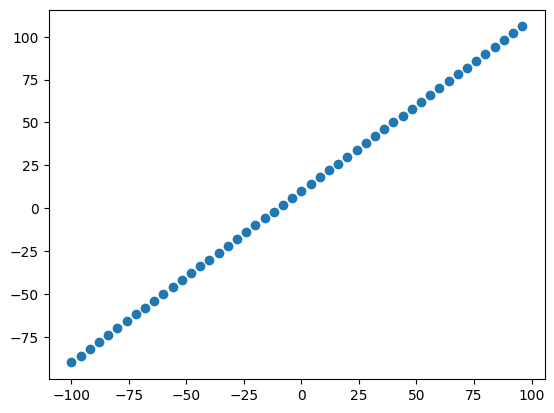

In [4]:
# Visualize the data

import matplotlib.pyplot as plt

plt.scatter(X, y);

### The 3 sets...

* **Training set**- the model learns from this dta, which is typically 70%-80% of the data you have available.
* **Validation set**- the model gets tuned on this data, this is typicaly 10-15% of teh available data.
* **Test set**- the model gets evaluates onthis dta to test what is has learned, this set is typicaly 10-15% ofthe total of data available.

In [5]:
# check the length fo how many samples we have

len(X)

50

In [80]:
# split the dta into train an test sets

X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20 % of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## *Visualizing* the data

Now we've got our data in training and test sets... let's visualize it again

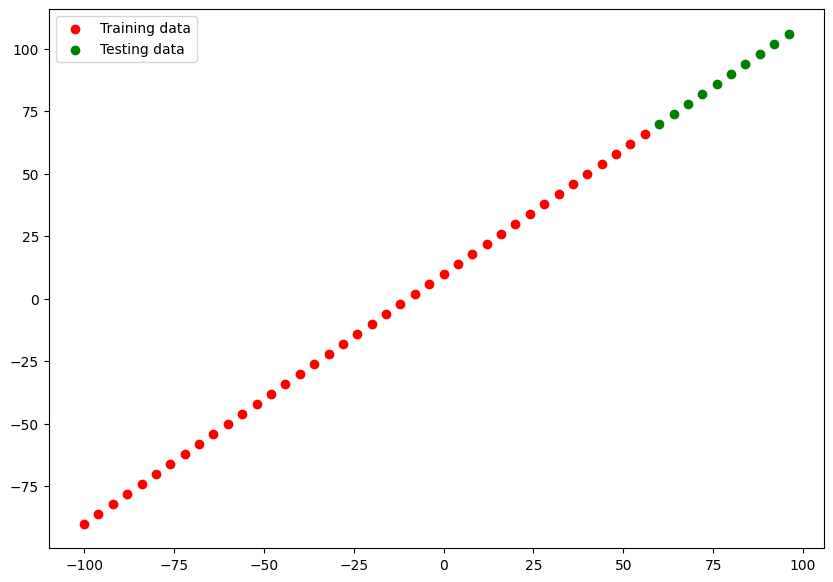

In [7]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='r', label='Training data');
# Plot test data in green

plt.scatter(X_test, y_test, c='g', label='Testing data');

# Show a legend
plt.legend();

In [12]:
#Let's have a look at how to build a neural network
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
    ], name="one_of_many_models_we_re_going_to_build")


# 2. Compile the model

model.compile(loss=tf.keras.losses.mae, # mae is short for mean square error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"]
              )

model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 49.6110 - mae: 49.6110
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 31.8740 - mae: 31.8740
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 36.4790 - mae: 36.4790
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 29.2512 - mae: 29.2512
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 15.8349 - mae: 15.8349
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 12.5494 - mae: 12.5494
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8125 - mae: 11.8125
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 12.8713 - mae: 12.8713
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 33.8100 - mae: 33.8100
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 23.1317 - mae: 23.1317
Epoch 11/100
2/2 [==============================] - 0s 7m

##Visualizing the model

In [9]:
model.summary()

Model: "one_of_many_models_we_re_going_to_build"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these pare the parameters (patterns) the model ca update as it trains
* Non-trainable parameters - thee parameters aren't updated during training (this is typical when ou bring in already lean patterns or parameters from other models during **transfer learning**)

In [14]:
# Get a summary of our model

model.summary()

Model: "one_of_many_models_we_re_going_to_build"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


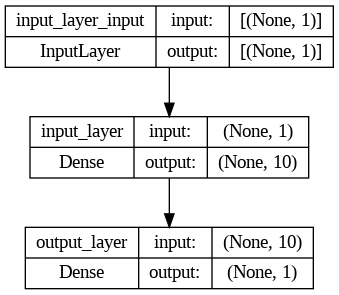

In [88]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, a good idea to plt them against the ground truth labels.

Often you'll see this in the gotm of `y_test`or `y_true` versus `y_pred` (ground truht versus your model's predictions).

In [15]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [16]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 88ms/step


array([[ 95.841385],
       [101.99499 ],
       [108.148605],
       [114.30222 ],
       [120.455826],
       [126.60945 ],
       [132.76309 ],
       [138.9167  ],
       [145.0703  ],
       [151.2239  ]], dtype=float32)

In [17]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

❎ **NOe

In [19]:
# Let's create a ploting function

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

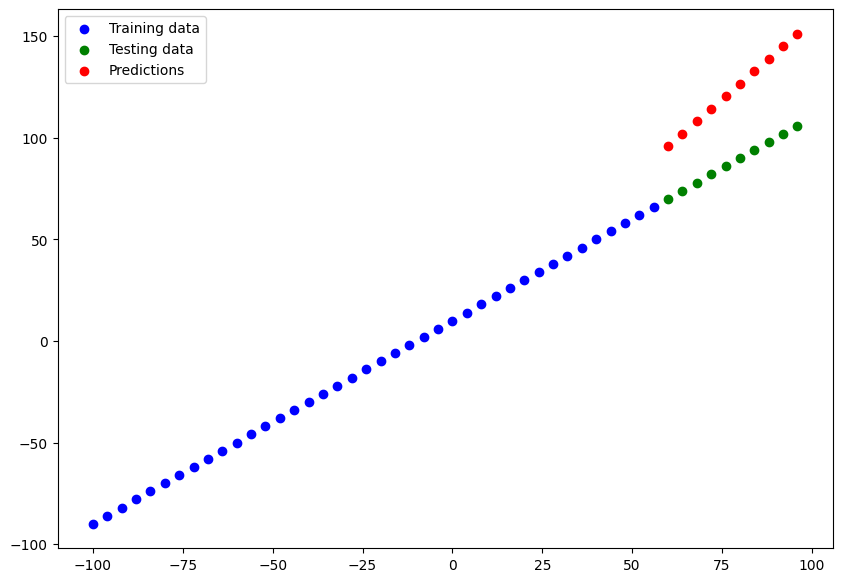

In [20]:
plot_predictions()

###Evaluating our model's predictions with regresion evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we'rw working on a regresion, two of main metrics:

* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"

* MSE mean square error, "square the average errors"

In [21]:
# Evaluate the model on the test

model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 137ms/step - loss: 35.5326 - mae: 35.5326


[35.532649993896484, 35.532649993896484]

In [22]:
# Calculate the mean absolute error

tf.metrics.mean_absolute_error(y_true=y_test,
                               y_pred=tf.constant(y_pred)).numpy().sum() / len(y_pred)

35.982366943359374

In [23]:
y_test  - y_pred

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[-25, -21, -17, -13,  -9,  -5,  -1,   3,   7,  11],
       [-31, -27, -23, -19, -15, -11,  -7,  -3,   1,   5],
       [-38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2],
       [-44, -40, -36, -32, -28, -24, -20, -16, -12,  -8],
       [-50, -46, -42, -38, -34, -30, -26, -22, -18, -14],
       [-56, -52, -48, -44, -40, -36, -32, -28, -24, -20],
       [-62, -58, -54, -50, -46, -42, -38, -34, -30, -26],
       [-68, -64, -60, -56, -52, -48, -44, -40, -36, -32],
       [-75, -71, -67, -63, -59, -55, -51, -47, -43, -39],
       [-81, -77, -73, -69, -65, -61, -57, -53, -49, -45]], dtype=int32)>

In [24]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 95.841385],
       [101.99499 ],
       [108.148605],
       [114.30222 ],
       [120.455826],
       [126.60945 ],
       [132.76309 ],
       [138.9167  ],
       [145.0703  ],
       [151.2239  ]], dtype=float32)>

In [25]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [26]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 95.841385, 101.99499 , 108.148605, 114.30222 , 120.455826,
       126.60945 , 132.76309 , 138.9167  , 145.0703  , 151.2239  ],
      dtype=float32)>

In [27]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=35.532646>

# Calculate mean square error

In [28]:
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1300.833>

In [29]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))


def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                      y_pred=tf.squeeze(y_pred))


def mae_mse(y_true, y_pred):
  return {
      "mae": mae(y_true, y_pred),
      "mse": mse(y_true, y_pred)
  }

mae_mse(y_true=y_test,
        y_pred=y_pred)

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=35.532646>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1300.833>}

### Runing experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> fit it...
```

1. Get more data - get more examples got your model to train  on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using a more complex model) - this might comi in ofr of more labeyers or more hidden units in each layer.
3. Train for longer - give your model change to find pattern in data.

Let's do 3 modelling experiments

1. `model_1` - same as the original mdoeo, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.

3. `model_3` - 2 layers, trained fro 500 epochs.

**Build `model_1`**

In [30]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [114]:
import numpy as np

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
  ])

# 2. Compile  the model

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(np.reshape(X_train, (-1, 1)), y_train, epochs=100, verbose=0)

In [115]:
model_1.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [116]:
# Make a plot of predictions model_1
y_preds_1 = model_1.predict(X_test)

y_preds_1

1/1 [==============================] - 0s 51ms/step


array([[ 74.57999 ],
       [ 79.46669 ],
       [ 84.35339 ],
       [ 89.240105],
       [ 94.126816],
       [ 99.01352 ],
       [103.90022 ],
       [108.786934],
       [113.673645],
       [118.56035 ]], dtype=float32)

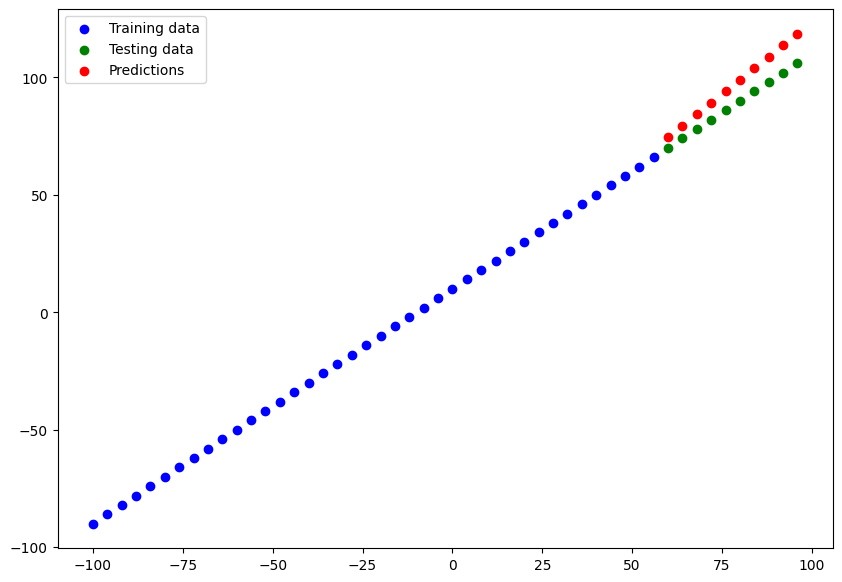

In [117]:
plot_predictions(predictions=y_preds_1)

In [45]:
# Calculate model_1 evaluation metrics

mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.575075>,
 <tf.Tensor: shape=(), dtype=float32, numpy=80.02684>)

**Build `model_2`**

* 2 dense layers, trained form 100 epochs

In [128]:
# Set random seed
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(np.reshape(X_train, (-1, 1)), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 21.0309 - mae: 21.0309
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 22.2041 - mae: 22.2041
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 27.8990 - mae: 27.8990
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 12.6539 - mae: 12.6539
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 15.6062 - mae: 15.6062
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 12.3747 - mae: 12.3747
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 11.6519 - mae: 11.6519
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 12.0475 - mae: 12.0475
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 37.7313 - mae: 37.7313
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 25.3632 - mae: 25.3632
Epoch 11/100
2/2 [==============================] - 0s 

In [129]:
y_preds_2 = model_2.predict(X_test)

y_preds_2

1/1 [==============================] - 0s 56ms/step


array([[ 70.47636 ],
       [ 75.05885 ],
       [ 79.64134 ],
       [ 84.22384 ],
       [ 88.80632 ],
       [ 93.388824],
       [ 97.97131 ],
       [102.5538  ],
       [107.13629 ],
       [111.71879 ]], dtype=float32)

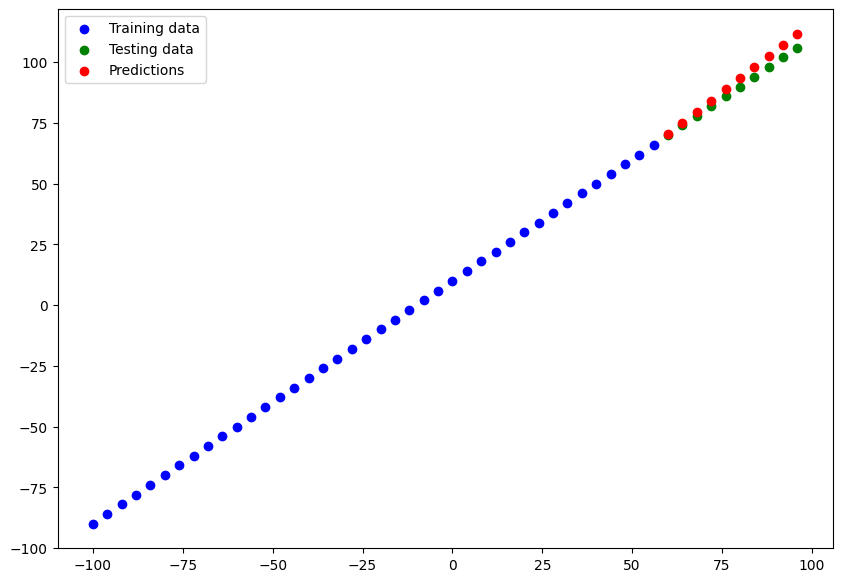

In [130]:
# Make and plot predictions
plot_predictions(predictions=y_preds_2)

In [101]:
# Calculate model 2 evaluation metrics

mae_2 = mae(y_test, tf.squeeze(y_preds_2))
mse_2 = mse(y_test, tf.squeeze(y_preds_2))

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.0016618>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.774309>)

** Build `model_3`**
* 2 dense layers, trained for 500 epochs


In [103]:
# Set random seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.reshape(X_train, (-1, 1)), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 12ms/step - loss: 25.4899 - mae: 25.4899
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 24.1843 - mae: 24.1843
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 29.0445 - mae: 29.0445
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 19.9866 - mae: 19.9866
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 13.4795 - mae: 13.4795
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 10.8710 - mae: 10.8710
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.8564 - mae: 11.8564
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 10.8147 - mae: 10.8147
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 36.9657 - mae: 36.9657
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 24.7171 - mae: 24.7171
Epoch 11/500
2/2 [==============================] - 0s 7ms

In [105]:
y_preds_3 = model_3.predict(X_test)

y_preds_3

1/1 [==============================] - 0s 87ms/step


array([[16.977346],
       [17.816465],
       [18.655588],
       [19.49471 ],
       [20.333832],
       [21.172953],
       [22.012075],
       [22.851196],
       [23.690317],
       [24.52944 ]], dtype=float32)

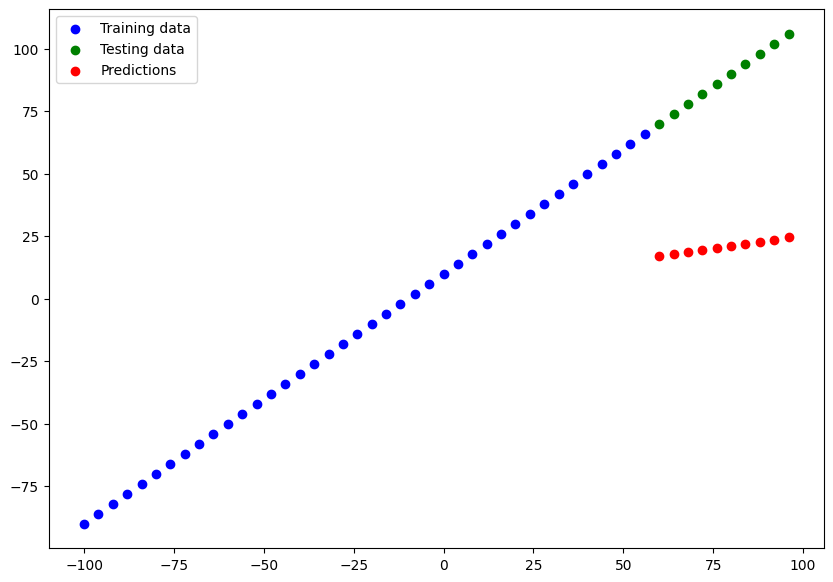

In [106]:
plot_predictions(predictions=y_preds_3)

In [107]:
mae_3 = mae(y_test, tf.squeeze(y_preds_3))
mse_3 = mse(y_test, tf.squeeze(y_preds_3))

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.246605>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4604.533>)

## Comparing the results of our experiments

We've run a few experiments, let's compare our experiments

**Note:** You want to start with small experiments and make sure the work and then increase the scale when necessary

In [133]:
# Let's compare our models results using pandas dataframe

import pandas as pd

mode_result = [["model_1", mae_1.numpy(), mse_1.numpy()],
              ["model_2", mae_2.numpy(), mse_2.numpy()],
              ["model_3", mae_3.numpy(), mse_3.numpy()]]


model_results = pd.DataFrame(mode_result, columns=["model", "mae", "mse"])

model_results


,model,mae,mse
0,model_1,8.575075,80.026840
1,model_2,3.001662,11.774309
2,model_3,67.246605,4604.533203


## Tracking your experiments

One really goo habit in machine learning modelling is to track the results of your experiments.

Luckily, there are tools to help us!

* Tensorboard - a com ponent of the tensorflow library to ehlp modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into Tensorboard)

## Saving the model

Save our model allow us to use them outside of Google collab (or wherever they were trained) such as web or mobile application.

There are two main formats we can save our model's too:

1. The saved model format

2. The HDF5 format

In [134]:
model_2.save("best_model_saved_model_format")

In [135]:
model_2.save("best_model_saved_model_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
